In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # for handling categorical variables

from collections import Counter

from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

from matplotlib import rcParams

In [2]:
data = pd.read_csv("PCOS_data.csv")



data = data.drop(['Sl. No','Patient File No.'], axis=1)
data = data.drop(['Unnamed: 44'], axis=1)


data.isnull().sum()
data=data.dropna()
data.isnull().sum()




pd.options.mode.copy_on_write = True

index = data[data['AMH(ng/mL)'] == 'a'].index
data.drop(index, inplace=True)




data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].replace('1.99.', '1.99')
data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].astype(float)
#df[column_name].replace([old_valuel, old_value2, old value3], new value)



data.iloc[:,0]

ones=0
zeros=0
for i in data.iloc[:,0]:
    if i==0:
        zeros=zeros+1
    elif i==1:
        ones=ones+1
print("ones: ",ones)
print("zeros: ",zeros)


X = data.drop('PCOS (Y/N)',axis=1)
y = data['PCOS (Y/N)']

print(X.shape, y.shape)

ones:  176
zeros:  362
(538, 41) (538,)


In [3]:
chi2_sorted = ['Skin darkening (Y/N)','hair growth(Y/N)','Weight gain(Y/N)','Cycle(R/I)','Cycle length(days)','Pimples(Y/N)','BMI','Hair loss(Y/N)','Waist(inch)','Hip(inch)','Weight (Kg)',' Age (yrs)']

ft_rank = ['Follicle No. (R)',	'Follicle No. (L)'	,'Skin darkening (Y/N)',	'hair growth(Y/N)'	,'Weight gain(Y/N)'	,'Cycle(R/I)',
           	'Cycle length(days)',	'Pimples(Y/N)',	'BMI'	,'Hair loss(Y/N)'	,'Waist(inch)',	'Hip(inch)',	'Weight (Kg)',	' Age (yrs)',
            'Avg. F size (L) (mm)'] #,	'LH(mIU/mL)',	'Hb(g/dl)',	'PRL(ng/mL)'	,'FSH/LH',	'RBS(mg/dl)',	'Endometrium (mm)',	'FSH(mIU/mL)'] 

## 15 features

In [4]:

    rnkk = ft_rank   
    mxindx = 291
    ac= []
    f=[]
    rec=[]

    select3 = [] 
    # Loop through features, incrementally adding them
    for i in rnkk:
        select3.append(i)
        # print("select: ", select3)
        datanew1 = np.array(X.loc[:,select3])
        mn = np.mean(datanew1, axis=0)
        stdd = np.std(datanew1, axis=0)
        datax = datanew1 - mn
        datanew1 = datax/stdd
        
        # Select features up to the current index
        X_train, X_test, y_train, y_test = train_test_split(datanew1, y, test_size=0.25, random_state=mxindx)
        svm_model = SVC(class_weight='balanced', kernel='rbf',C=1,gamma=0.005)
        svm_model.fit(X_train, y_train)
        y_pred = svm_model.predict(X_test)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        TN, FP, FN, TP = cm.ravel()
        # Accuracy
        accuracy = 100*accuracy_score(y_test, y_pred)
        # Sensitivity (Recall)
        sensitivity = 100*recall_score(y_test, y_pred)
        # Specificity
        specificity = 100*TN / (TN + FP)
        ac.append(accuracy)

        print(f'iteration {i} __ accuracy: {accuracy:.2f}, sen: {sensitivity:.2f}, spe: {specificity:.2f}')


iteration Follicle No. (R) __ accuracy: 85.93, sen: 78.05, spe: 89.36
iteration Follicle No. (L) __ accuracy: 90.37, sen: 87.80, spe: 91.49
iteration Skin darkening (Y/N) __ accuracy: 91.85, sen: 92.68, spe: 91.49
iteration hair growth(Y/N) __ accuracy: 93.33, sen: 95.12, spe: 92.55
iteration Weight gain(Y/N) __ accuracy: 95.56, sen: 95.12, spe: 95.74
iteration Cycle(R/I) __ accuracy: 95.56, sen: 95.12, spe: 95.74
iteration Cycle length(days) __ accuracy: 96.30, sen: 95.12, spe: 96.81
iteration Pimples(Y/N) __ accuracy: 97.78, sen: 97.56, spe: 97.87
iteration BMI __ accuracy: 97.04, sen: 97.56, spe: 96.81
iteration Hair loss(Y/N) __ accuracy: 96.30, sen: 95.12, spe: 96.81
iteration Waist(inch) __ accuracy: 96.30, sen: 95.12, spe: 96.81
iteration Hip(inch) __ accuracy: 97.04, sen: 95.12, spe: 97.87
iteration Weight (Kg) __ accuracy: 95.56, sen: 92.68, spe: 96.81
iteration  Age (yrs) __ accuracy: 97.78, sen: 97.56, spe: 97.87
iteration Avg. F size (L) (mm) __ accuracy: 97.04, sen: 97.56,

Text(0, 0.5, 'classification accuracy (in %)')

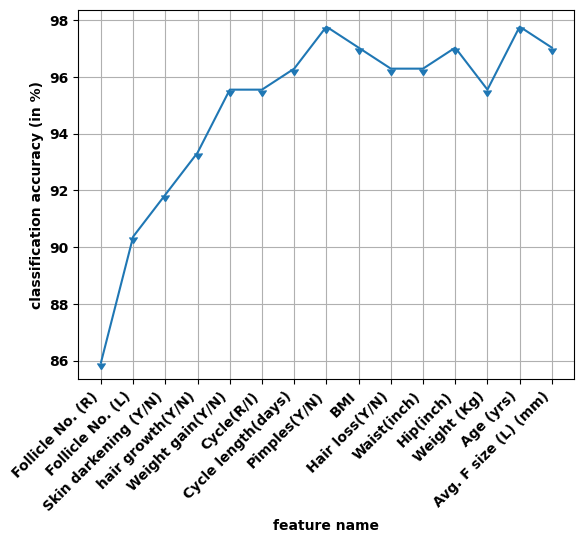

In [5]:

rcParams['font.weight'] = 'bold'
rcParams['axes.axisbelow'] = True

plt.grid()
plt.plot( rnkk  , ac, marker=11)# ft_rank chi2_sorted
plt.xticks(rotation=45, ha='right')
plt.xlabel('feature name', weight='bold')
plt.ylabel('classification accuracy (in %)', weight='bold')


## 12 features

In [6]:


    rnkk = chi2_sorted   
    mxindx = 394
    ac= []
    f=[]
    rec=[]

    select3 = [] 
    # Loop through features, incrementally adding them
    for i in rnkk:
        select3.append(i)
        # print("select: ", select3)
        datanew1 = np.array(X.loc[:,select3])
        mn = np.mean(datanew1, axis=0)
        stdd = np.std(datanew1, axis=0)
        datax = datanew1 - mn
        datanew1 = datax/stdd
        
        # Select features up to the current index
        X_train, X_test, y_train, y_test = train_test_split(datanew1, y, test_size=0.25, random_state=mxindx)
        svm_model = SVC(class_weight='balanced', kernel='rbf',C=1,gamma='auto',probability=True)
        svm_model.fit(X_train, y_train)
        y_pred = svm_model.predict(X_test)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        TN, FP, FN, TP = cm.ravel()
        # Accuracy
        accuracy = 100*accuracy_score(y_test, y_pred)
        # Sensitivity (Recall)
        sensitivity = 100*recall_score(y_test, y_pred)
        # Specificity
        specificity = 100*TN / (TN + FP)
        ac.append(accuracy)

        print(f'iteration {i} __ accuracy: {accuracy:.2f}, sen: {sensitivity:.2f}, spe: {specificity:.2f}')

iteration Skin darkening (Y/N) __ accuracy: 81.48, sen: 76.09, spe: 84.27
iteration hair growth(Y/N) __ accuracy: 82.22, sen: 93.48, spe: 76.40
iteration Weight gain(Y/N) __ accuracy: 91.11, sen: 84.78, spe: 94.38
iteration Cycle(R/I) __ accuracy: 90.37, sen: 84.78, spe: 93.26
iteration Cycle length(days) __ accuracy: 90.37, sen: 86.96, spe: 92.13
iteration Pimples(Y/N) __ accuracy: 91.11, sen: 86.96, spe: 93.26
iteration BMI __ accuracy: 91.11, sen: 89.13, spe: 92.13
iteration Hair loss(Y/N) __ accuracy: 92.59, sen: 91.30, spe: 93.26
iteration Waist(inch) __ accuracy: 91.11, sen: 89.13, spe: 92.13
iteration Hip(inch) __ accuracy: 91.11, sen: 89.13, spe: 92.13
iteration Weight (Kg) __ accuracy: 89.63, sen: 89.13, spe: 89.89
iteration  Age (yrs) __ accuracy: 90.37, sen: 84.78, spe: 93.26


Text(0, 0.5, 'classification accuracy (in %)')

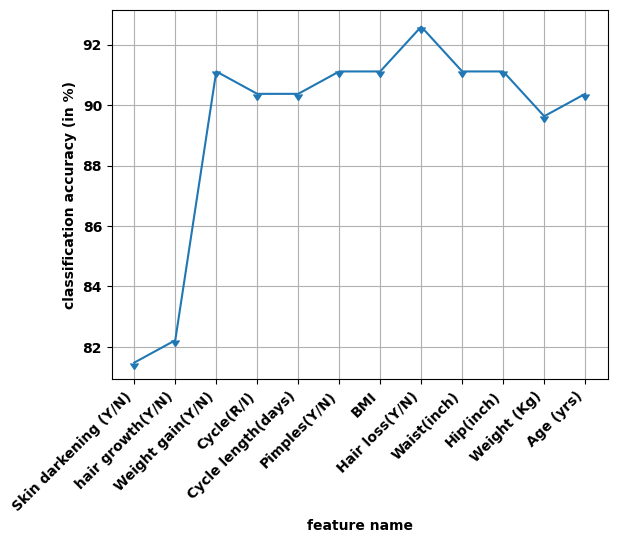

In [7]:

rcParams['font.weight'] = 'bold'
rcParams['axes.axisbelow'] = True

plt.grid()
plt.plot( rnkk  , ac, marker=11)# ft_rank chi2_sorted
plt.xticks(rotation=45, ha='right')
plt.xlabel('feature name', weight='bold')
plt.ylabel('classification accuracy (in %)', weight='bold')


## finding coeff and testing sample 

In [9]:

xtmp = np.array(X.loc[:,chi2_sorted])
y = np.array(y)
print(xtmp.shape)
mn = np.mean(xtmp, axis=0)
stdd = np.std(xtmp, axis=0)
datax = xtmp - mn
xtmp = datax/stdd

support_vectors = svm_model.support_vectors_
dual_coefficients = svm_model.dual_coef_[0]
intercept = svm_model.intercept_[0]
gamma = svm_model._gamma


print(support_vectors,'\n')
print(dual_coefficients,'\n')
print(intercept,'\n')
print(gamma,'\n')


def rbf_kernel(x, y, gamma):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

def predict(sample, support_vectors, dual_coefficients, intercept, gamma):
    decision = sum(dual_coefficients[i] * rbf_kernel(sample, support_vectors[i], gamma) for i in range(len(support_vectors)))
    # print(decision, intercept)
    # return np.sign(decision + intercept)
    return 1 if (decision + intercept)>0 else 0


# put any sample number
sampidx = 123
ysamp = y[sampidx]
xsamp = xtmp[sampidx,:]
ypred = svm_model.predict(xsamp.reshape(1,-1))
print('______________________-')
# probb = svm_model.predict_log_proba((xtmp[sampidx,:]).reshape(1,-1))
probb = svm_model.predict_proba(xsamp.reshape(1,-1))
print(f'sample belongs to {ysamp}, model predicted as {ypred}, with prob {probb}')

# Example prediction
pred1 = predict(xsamp, support_vectors, dual_coefficients, intercept, gamma)
print("Prediction:", pred1)

(538, 12)
[[-6.65100932e-01 -6.16025308e-01 -7.81523156e-01 ... -5.02965219e-01
  -5.11201497e-01 -1.00209049e+00]
 [-6.65100932e-01 -6.16025308e-01 -7.81523156e-01 ...  4.67874622e-04
  -8.73495462e-01  2.92104568e-01]
 [-6.65100932e-01  1.62330993e+00 -7.81523156e-01 ...  5.03900968e-01
   1.48141531e+00 -6.32320476e-01]
 ...
 [-6.65100932e-01 -6.16025308e-01 -7.81523156e-01 ... -1.25811486e+00
  -1.14521593e+00 -8.17205485e-01]
 [ 1.50353120e+00  1.62330993e+00 -7.81523156e-01 ...  5.03900968e-01
   3.22394490e-02 -8.17205485e-01]
 [ 1.50353120e+00 -6.16025308e-01  1.27955262e+00 ...  1.00733406e+00
  -2.39481024e-01 -6.32320476e-01]] 

[-0.73809524 -0.73809524 -0.73809524 -0.73809524 -0.73809524 -0.71206388
 -0.73809524 -0.73809524 -0.73809524 -0.73809524 -0.73809524 -0.55368033
 -0.73809524 -0.73809524 -0.73809524 -0.73809524 -0.73809524 -0.73809524
 -0.73809524 -0.6680696  -0.73809524 -0.2446537  -0.73809524 -0.73809524
 -0.73809524 -0.73809524 -0.73809524 -0.40796163 -0.73809524